# Model Code

## Downloading the dataset:

The following codecell downloads the dataset into a folder named `fashion_mnist_images` which is divided into a `test` and `train` directory which again contain subdirectories numbered 0 to 9, that correspond to the images class (clothing category).

In [18]:
import os
import urllib.request
from zipfile import ZipFile

URL = 'https://nnfs.io/datasets/fashion_mnist_images.zip'
FILE = 'fashion_mnist_images.zip'
FOLDER = 'fashion_mnist_images'

try:
    if not os.path.isfile(FILE):
        print(f'Downloading {URL} and saving as {FILE}...')
        urllib.request.urlretrieve(URL, FILE)
    else:
        print(f'{FILE} already exists. Skipping download.')
    
    print('Unzipping images...')
    with ZipFile(FILE, 'r') as zip_images:
        zip_images.extractall(FOLDER)
    print('Done!')
except Exception as e:
    print(f'An error occurred: {e}')


Unzipping images...
Done!


## Data loading:

Each image is 28x28 pixels and can be imported with `cv2` into a 2D-Array.

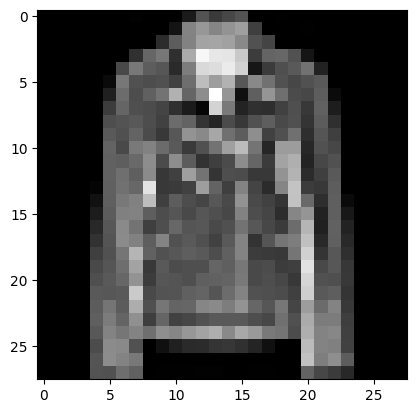

In [22]:
import cv2
image_data = cv2.imread('fashion_mnist_images/train/4/0011.png', cv2.IMREAD_UNCHANGED)
import matplotlib.pyplot as plt
plt.imshow(image_data, cmap='gray')
plt.show()

Now we create functions to return both the training and test datasets.

In [23]:
import numpy as np

# Loads a MNIST dataset
def load_mnist_dataset(dataset, path):
    # Scan all the directories and create a list of labels
    labels = os.listdir(os.path.join(path, dataset))
    # Create lists for samples and labels
    X = []
    y = []
    # For each label folder
    for label in labels:
        # And for each image in given folder
        for file in os.listdir(os.path.join(path, dataset, label)):
            # Read the image
            image = cv2.imread(os.path.join(
            path, dataset, label, file
            ), cv2.IMREAD_UNCHANGED)
            # And append it and a label to the lists
            X.append(image)
            y.append(label)
    # Convert the data to proper numpy arrays and return
    return np.array(X), np.array(y).astype('uint8')

# MNIST dataset (train + test)
def create_data_mnist(path):
    # Load both sets separately
    X, y = load_mnist_dataset('train', path)
    X_test, y_test = load_mnist_dataset('test', path)
    # And return all the data
    return X, y, X_test, y_test

The datasets are saved to a training dataset (X, y) and testing dataset (X_test, y_test). We then scale them down to the range -1 to 1, before reshaping the input values to a 1D-array.

In [30]:
# Create dataset
X, y, X_test, y_test = create_data_mnist('fashion_mnist_images')

# Scale features (-1 to 1)
X = (X.astype(np.float32) - 127.5) / 127.5
X_test = (X_test.astype(np.float32) - 127.5) / 127.5

# Reshape to vectors
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

(60000, 784)
(60000,)


The following code rearranges the dataset so it does not come class wise, but randomly.

In [ ]:
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)

X = X[keys]
y = y[keys]

In [ ]:
EPOCHS = 10
BATCH_SIZE = 128 # We take 128 samples at once
# Calculate number of steps
steps = X.shape[0] // BATCH_SIZE
# Dividing rounds down. If there are some remaining data,
# but not a full batch, this won't include it.
# Add 1 to include the remaining samples in 1 more step.
if steps * BATCH_SIZE < X.shape[0]:
    steps += 1
 
for epoch in range(EPOCHS):
    for step in range(steps):
        batch_X = X[step*BATCH_SIZE:(step+1)*BATCH_SIZE]
        batch_y = y[step*BATCH_SIZE:(step+1)*BATCH_SIZE]
 # Now we perform forward pass, loss calculation,
 # backward pass and update parameters

In [ ]:
# Instantiate the model
model = Model()
# Add layers
model.add(Layer_Dense(X.shape[1], 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 10))
model.add(Activation_Softmax())
# Set loss, optimizer and accuracy objects
model.set(
 loss=Loss_CategoricalCrossentropy(),
 optimizer=Optimizer_Adam(decay=1e-3),
 accuracy=Accuracy_Categorical()
)
# Finalize the model
model.finalize()
# Train the model
model.train(X, y, validation_data=(X_test, y_test),
 epochs=10, batch_size=128, print_every=100)